# SETUP ENV



In [ ]:
pip install transformers -q

     |████████████████████████████████| 3.4 MB 9.8 MB/s 
     |████████████████████████████████| 67 kB 5.4 MB/s 
     |████████████████████████████████| 3.3 MB 39.2 MB/s 
     |████████████████████████████████| 895 kB 47.4 MB/s 
     |████████████████████████████████| 596 kB 50.0 MB/s 


In [ ]:
import os.path, os

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import requests 
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

#GET Data

## Preprocess Data

In [ ]:
IMAGE_PATH_large = '/content/drive/MyDrive/OCR_Data/Large Test'
IMAGE_PATH_medium = '/content/drive/MyDrive/OCR_Data/Medium Test'
IMAGE_PATH_small = '/content/drive/MyDrive/OCR_Data/Small Test'

# create empty labels list
imgName_small = []
imgName_large = []
imgName_medium = []

In [ ]:
#/content/drive/MyDrive/Small Test/00700310666e007443e58fb5361bda30.jpg
# now looping through all the image paths and loading labels and image_list 
for filename in os.listdir(IMAGE_PATH_large):
  # collect img to list
  if filename.endswith(".png") or filename.endswith(".PNG") or \
  filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".jpeg"): 
    # append file name to list
    filename = 'Large Test/' + filename 
    imgName_large.append(filename)
    continue
  else:
    continue

In [ ]:
#/content/drive/MyDrive/Small Test/00700310666e007443e58fb5361bda30.jpg
# now looping through all the image paths and loading labels and image_list 
for filename in os.listdir(IMAGE_PATH_medium):
  # collect img to list
  if filename.endswith(".png") or filename.endswith(".PNG") or \
  filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".jpeg"): 
    # append file name to list
    filename = 'Medium Test/' + filename 
    imgName_medium.append(filename)
    continue
  else:
    continue

In [ ]:
for filename in os.listdir(IMAGE_PATH_small):
  # collect img to list
  if filename.endswith(".png") or filename.endswith(".PNG") or \
  filename.endswith(".jpg") or filename.endswith(".JPG") or filename.endswith(".jpeg"): 
    # append file name to list
    filename = 'Small Test/' + filename 
    imgName_small.append(filename)
    continue
  else:
    continue

In [ ]:
print(len(imgName_small))
print(len(imgName_medium))
print(len(imgName_large))

220
650
1300


In [ ]:
all = imgName_small + imgName_medium + imgName_large

In [ ]:
# import pandas as pd
col = {"filename": all}
my_data =  pd.DataFrame(col)
my_data

,filename
0,Small Test/1a4545ae6128dab578f90fb22b55758a.png
1,Small Test/e297ec8d07a7b8b96c4ae16236d3b442.png
2,Small Test/1bc5d2ff9a7e9fdbff5f2f68f42ff64e.png
3,Small Test/f34c7b3405df590f88d4cf7b046ebed6.jpg
4,Small Test/629ab866836150706a45ee0e9108697a.png
...,...
2165,Large Test/4e6ade80059eaf809d438ebc0f8df692.png
2166,Large Test/7ab2a40995f5bc778ac40a84a94574c6.png
2167,Large Test/b47ebf42c67eb25222f9c3cb73544930.jpg
2168,Large Test/931dcacdfe02b0b9beb07e4567fac9bf.png


In [ ]:
my_data.to_csv("filename_data.csv")

#Create Model

In [ ]:
from transformers import TrOCRForCausalLM, TrOCRConfig
# configuration = TrOCRConfig()

In [ ]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-handwritten").to(device)

Downloading:   0%|          | 0.00/4.03k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/228 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.28k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.08G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config.max_length = 10
# model.config.dropout = 0.5
model.config.activation_function = "gelu"
def TrOCR(filename):
    image = Image.open("/content/drive/MyDrive/OCR_Data/" + filename).convert("RGB")

    pixel_values = processor(image, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)

    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

66f38...


5.831.


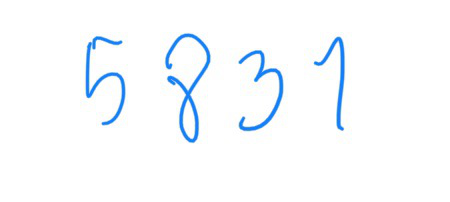

In [ ]:
pic = "Medium Test/2a37cc4b1a04f5540deeaf3b4beca502.jpg"
print(TrOCR(pic))
image = Image.open("/content/drive/MyDrive/OCR_Data/" + pic).convert("RGB")
display(image)

In [ ]:
labels = []
from tqdm.notebook import tqdm
for num, name in tqdm(enumerate(all), total=len(all)):
    # print(name)
    label = TrOCR(name)
    labels.append(label)
my_data["label"] = labels

  0%|          | 0/2170 [00:00<?, ?it/s]

#Post Process

In [ ]:
my_data[100:500]

,filename,label
100,Small Test/1a4fbed5330b86074f34cda6a2e7858e.png,1421.
101,Small Test/2a29496fb201d2dde83678d677d12076.jpg,2468...
102,Small Test/f95983e6e369c303adda0ce6e1556731.png,7751....
103,Small Test/746f73f19dfda74069c9812aff2bd0f3.jpg,8 8
104,Small Test/47228ac913497cf63fa4d7306c173773.jpg,9853...
...,...,...
495,Medium Test/9b437f59bc1d0292c2aaa070b2216b29.jpg,1247...
496,Medium Test/672c0bafbde2bdbc0215f749b93b7938.jpg,30 10...
497,Medium Test/3c602b7aaed550d252357b1a3922b281.jpg,2486....
498,Medium Test/98fc5681500bae80afd759067a8e36d6.jpg,0606..06


In [ ]:
my_data[]

In [ ]:
my_data.to_csv("Predict.csv")

In [ ]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170 entries, 0 to 2169
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2170 non-null   object
 1   label     2170 non-null   object
dtypes: object(2)
memory usage: 34.0+ KB


In [ ]:
import re
test = '3 28 9 8'
numbers = re.findall('[0-9]+', test)
temp = ''.join(numbers)
print(temp)

32898


In [ ]:
import re
my_data['new_label'] = ''
for i in range(len(my_data)):
    clean = str(my_data["label"][i])
    clean = clean.replace("b", "6")
    clean = clean.replace("s", "5")
    clean = clean.replace("o", "0")
    clean = clean.replace("a", "9")
    clean = clean.replace("m", "7")
    clean = clean.replace("q", "9")
    clean = clean.replace("g", "9")
    clean = clean.replace("z", "2")
    numbers = re.findall('[0-9]+', clean)
    temp = str(''.join(numbers))
    if temp == '':
        temp = '55'
    if len(temp) > 5:
        temp = temp[:5]
    my_data['new_label'][i] = temp

In [ ]:
my_data

,filename,label,new_label,Name
0,Small Test/1a4545ae6128dab578f90fb22b55758a.png,6152,6152,1a4545ae6128dab578f90fb22b55758a
1,Small Test/e297ec8d07a7b8b96c4ae16236d3b442.png,2 4.6.2..,2462,e297ec8d07a7b8b96c4ae16236d3b442
2,Small Test/1bc5d2ff9a7e9fdbff5f2f68f42ff64e.png,87917..7.,87917,1bc5d2ff9a7e9fdbff5f2f68f42ff64e
3,Small Test/f34c7b3405df590f88d4cf7b046ebed6.jpg,38714,38714,f34c7b3405df590f88d4cf7b046ebed6
4,Small Test/629ab866836150706a45ee0e9108697a.png,1674..,1674,629ab866836150706a45ee0e9108697a
...,...,...,...,...
2165,Large Test/4e6ade80059eaf809d438ebc0f8df692.png,32 8...,328,4e6ade80059eaf809d438ebc0f8df692
2166,Large Test/7ab2a40995f5bc778ac40a84a94574c6.png,910 1/,9101,7ab2a40995f5bc778ac40a84a94574c6
2167,Large Test/b47ebf42c67eb25222f9c3cb73544930.jpg,0 2/...,02,b47ebf42c67eb25222f9c3cb73544930
2168,Large Test/931dcacdfe02b0b9beb07e4567fac9bf.png,5.,5,931dcacdfe02b0b9beb07e4567fac9bf


In [ ]:
my_data['Name'] = ""
for i in range(len(my_data)):
    filename = my_data['filename'][i]
    start = filename.find("/")
    end = filename.find(".")
    name = filename[start+1:end]
    my_data['Name'][i] = name

In [ ]:
my_data.head()

,filename,label,new_label,Name
0,Small Test/1a4545ae6128dab578f90fb22b55758a.png,6152,6152,1a4545ae6128dab578f90fb22b55758a
1,Small Test/e297ec8d07a7b8b96c4ae16236d3b442.png,2 4.6.2..,2462,e297ec8d07a7b8b96c4ae16236d3b442
2,Small Test/1bc5d2ff9a7e9fdbff5f2f68f42ff64e.png,87917..7.,87917,1bc5d2ff9a7e9fdbff5f2f68f42ff64e
3,Small Test/f34c7b3405df590f88d4cf7b046ebed6.jpg,38714,38714,f34c7b3405df590f88d4cf7b046ebed6
4,Small Test/629ab866836150706a45ee0e9108697a.png,1674..,1674,629ab866836150706a45ee0e9108697a


##Merge Submissionform

In [ ]:
# my_data.drop(['label', 'imageName'], axis="columns", inplace=True)
submit = my_data[['Name', 'new_label']]

In [ ]:
submit

,Name,new_label
0,1a4545ae6128dab578f90fb22b55758a,6152
1,e297ec8d07a7b8b96c4ae16236d3b442,2462
2,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
3,f34c7b3405df590f88d4cf7b046ebed6,38714
4,629ab866836150706a45ee0e9108697a,1674
...,...,...
2165,4e6ade80059eaf809d438ebc0f8df692,328
2166,7ab2a40995f5bc778ac40a84a94574c6,9101
2167,b47ebf42c67eb25222f9c3cb73544930,02
2168,931dcacdfe02b0b9beb07e4567fac9bf,5


In [ ]:
submit = submit.rename(columns={"new_label": "Predicted", "Name": "Id"})
submit['Predicted'] = main_data['Predicted'].astype('object')

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,6152
1,e297ec8d07a7b8b96c4ae16236d3b442,2462
2,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
3,f34c7b3405df590f88d4cf7b046ebed6,38714
4,629ab866836150706a45ee0e9108697a,1674
...,...,...
2165,4e6ade80059eaf809d438ebc0f8df692,328
2166,7ab2a40995f5bc778ac40a84a94574c6,9101
2167,b47ebf42c67eb25222f9c3cb73544930,02
2168,931dcacdfe02b0b9beb07e4567fac9bf,5


In [ ]:
main_data = pd.read_csv("/content/sample_submission.csv")
main_data['Predicted'] = main_data['Predicted'].astype('object')

In [ ]:
main_data

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,6152
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462
3,f34c7b3405df590f88d4cf7b046ebed6,NaN
4,629ab866836150706a45ee0e9108697a,NaN
...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,NaN
2166,b5a3b8d297a574e4406bd11fd5b6ec24,NaN
2167,399434b91e74cb5211c5ea1a301f431a,NaN
2168,17c2c6feeea11a7779d21e6f99b7b714,NaN


In [ ]:
Submition = pd.merge(main_data,submit , on='Id',how='left')
Result = Submition[['Id', 'Predicted_y']].rename(columns={"Predicted_y": "Predicted"})
Result.to_csv("result_handwritten.csv", index=False)
Result

,Id,Predicted
0,1a4545ae6128dab578f90fb22b55758a,6152
1,1bc5d2ff9a7e9fdbff5f2f68f42ff64e,87917
2,e297ec8d07a7b8b96c4ae16236d3b442,2462
3,f34c7b3405df590f88d4cf7b046ebed6,38714
4,629ab866836150706a45ee0e9108697a,1674
...,...,...
2165,317aa1f54519e65ce1e3855346e7bad4,2223
2166,b5a3b8d297a574e4406bd11fd5b6ec24,6332
2167,399434b91e74cb5211c5ea1a301f431a,1993
2168,17c2c6feeea11a7779d21e6f99b7b714,676


In [ ]:
Submition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           2170 non-null   object
 1   Predicted_x  3 non-null      object
 2   Predicted_y  2170 non-null   object
dtypes: object(3)
memory usage: 67.8+ KB
